* $x''(t) + kx'(t) + wx(t) = sin(t^2)$

    - $u_1(t) = x(t)$
    - $u_2(t) = x'(t)$
---
* ODE system:
    - $f_1(t,u_1,u_2):  u_2'(t) = sin(t^2) - ku_2(t) - wu_1(t)$
    - $f_2(t,u_1,u_2):  u_1'(t) = u_2(t)$

    - initial values: $u_1(0) = w_{1,0} = u_2(0) = w_{2,0} = 1$

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# define function f1 
def f1(t,u1,u2):
    return u2

# define function f2
def f2(t,u1,u2):
    f2 = math.sin(t**2)-u2-u1
    return f2

In [178]:
# Runge-Kutta method (order four)
def RK_four(a=0,b=10,init_val=[1,1]):
    
    solx_list = list()
    solxp_list = list()
    
    for h in [0.1,0.05,0.025]:
        w1_prev = init_val[0]
        w2_prev = init_val[1]
        ti = a
        N = int((b-a)/h)
        
        plot_list_x = [init_val[0]]
        plot_list_xp = [init_val[1]]
        
        for i in range(1,N+1):
            
            k11 = h*f1(ti,w1_prev,w2_prev)
            k12 = h*f2(ti,w1_prev,w2_prev)
            
            k21 = h*f1(ti + h/2, w1_prev + 1/2*k11, w2_prev + 1/2*k12)
            k22 = h*f2(ti + h/2, w1_prev + 1/2*k11, w2_prev + 1/2*k12)
            
            k31 = h*f1(ti + h/2, w1_prev + 1/2*k21, w2_prev + 1/2*k22)
            k32 = h*f2(ti + h/2, w1_prev + 1/2*k21, w2_prev + 1/2*k22)
            
            k41 = h*f1(ti + h, w1_prev + k31, w2_prev + k32)
            k42 = h*f2(ti + h, w1_prev + k31, w2_prev + k32)
            
            w1_new = w1_prev + (k11 + 2*k21 + 2*k31 +k41)/6
            w2_new = w2_prev + (k12 + 2*k22 + 2*k32 +k42)/6
            
            w1_prev = w1_new
            w2_prev = w2_new
            
            ti = a + i*h
            
            plot_list_x.append(w1_new)
            plot_list_xp.append(w2_new)
    
        solx_list.append(plot_list_x) 
        solxp_list.append(plot_list_xp)
    
    return solx_list, solxp_list

In [179]:
solx_list, solxp_list = RK_four(0,10)

In [180]:
x_sol_h1 = solx_list[0] # h = 0.1
x_sol_h2 = solx_list[1] # h = 0.05
x_sol_h3 = solx_list[2] # h = 0.025

In [181]:
xp_sol_h1 = solxp_list[0] # h = 0.1
xp_sol_h2 = solxp_list[1] # h = 0.05
xp_sol_h3 = solxp_list[2] # h = 0.025

In [182]:
t_h1 = np.arange(0, 10.1, 0.1)
t_h2 = np.arange(0, 10.05, 0.05)
t_h3 = np.arange(0, 10.025, 0.025)

Text(0.5, 1.0, 'solution for x when h = 0.1')

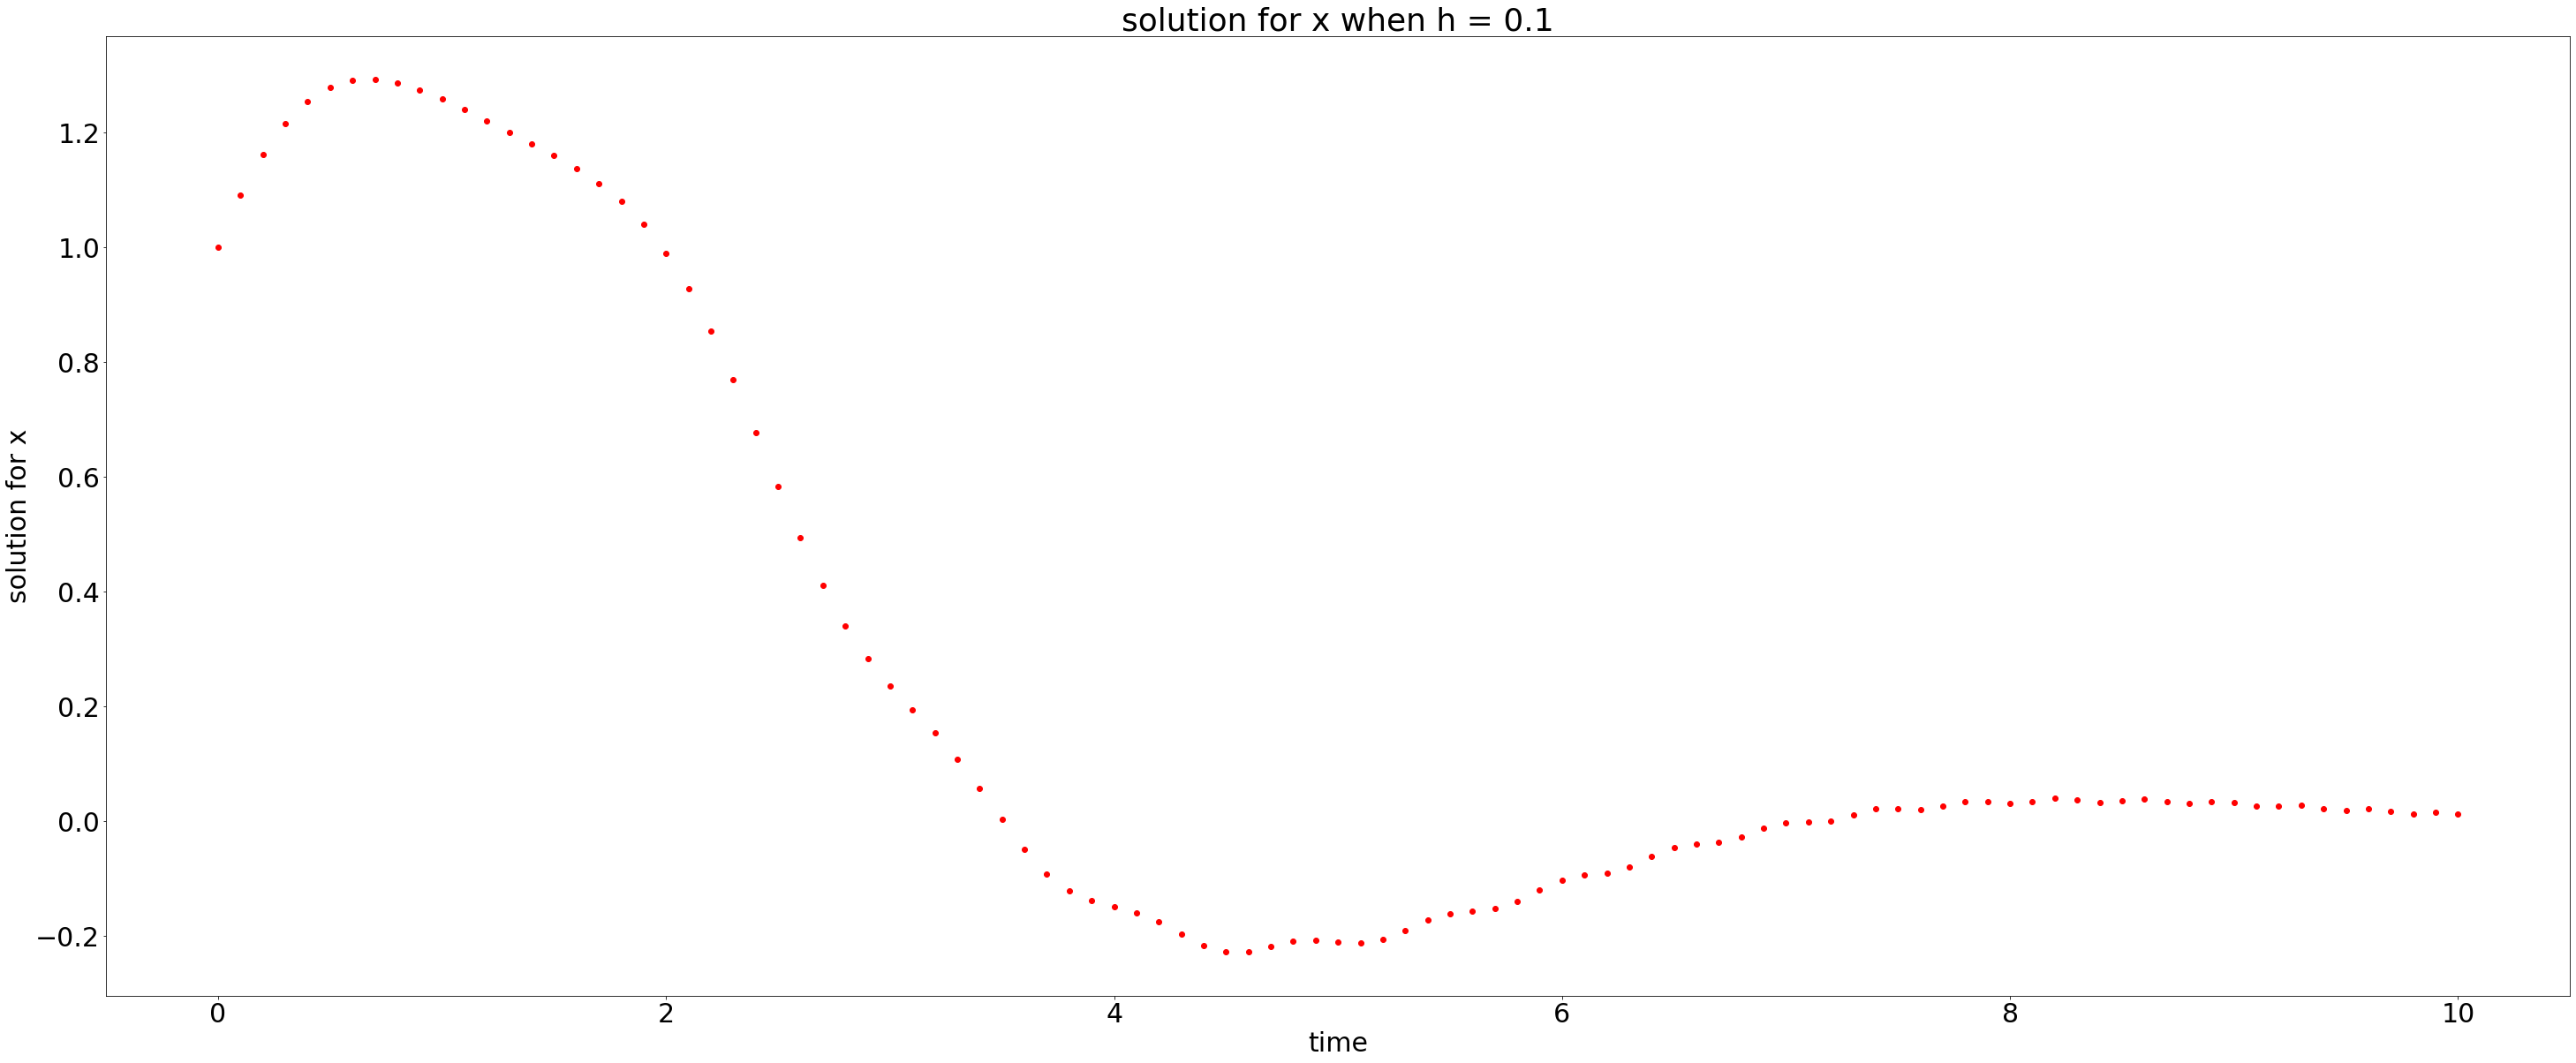

In [196]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 30})
plt.scatter(t_h1,x_sol_h1,alpha=1, color='r')
plt.xlabel('time')
plt.ylabel('solution for x')
plt.title('solution for x when h = 0.1')

Text(0.5, 1.0, 'solution for x when h = 0.05')

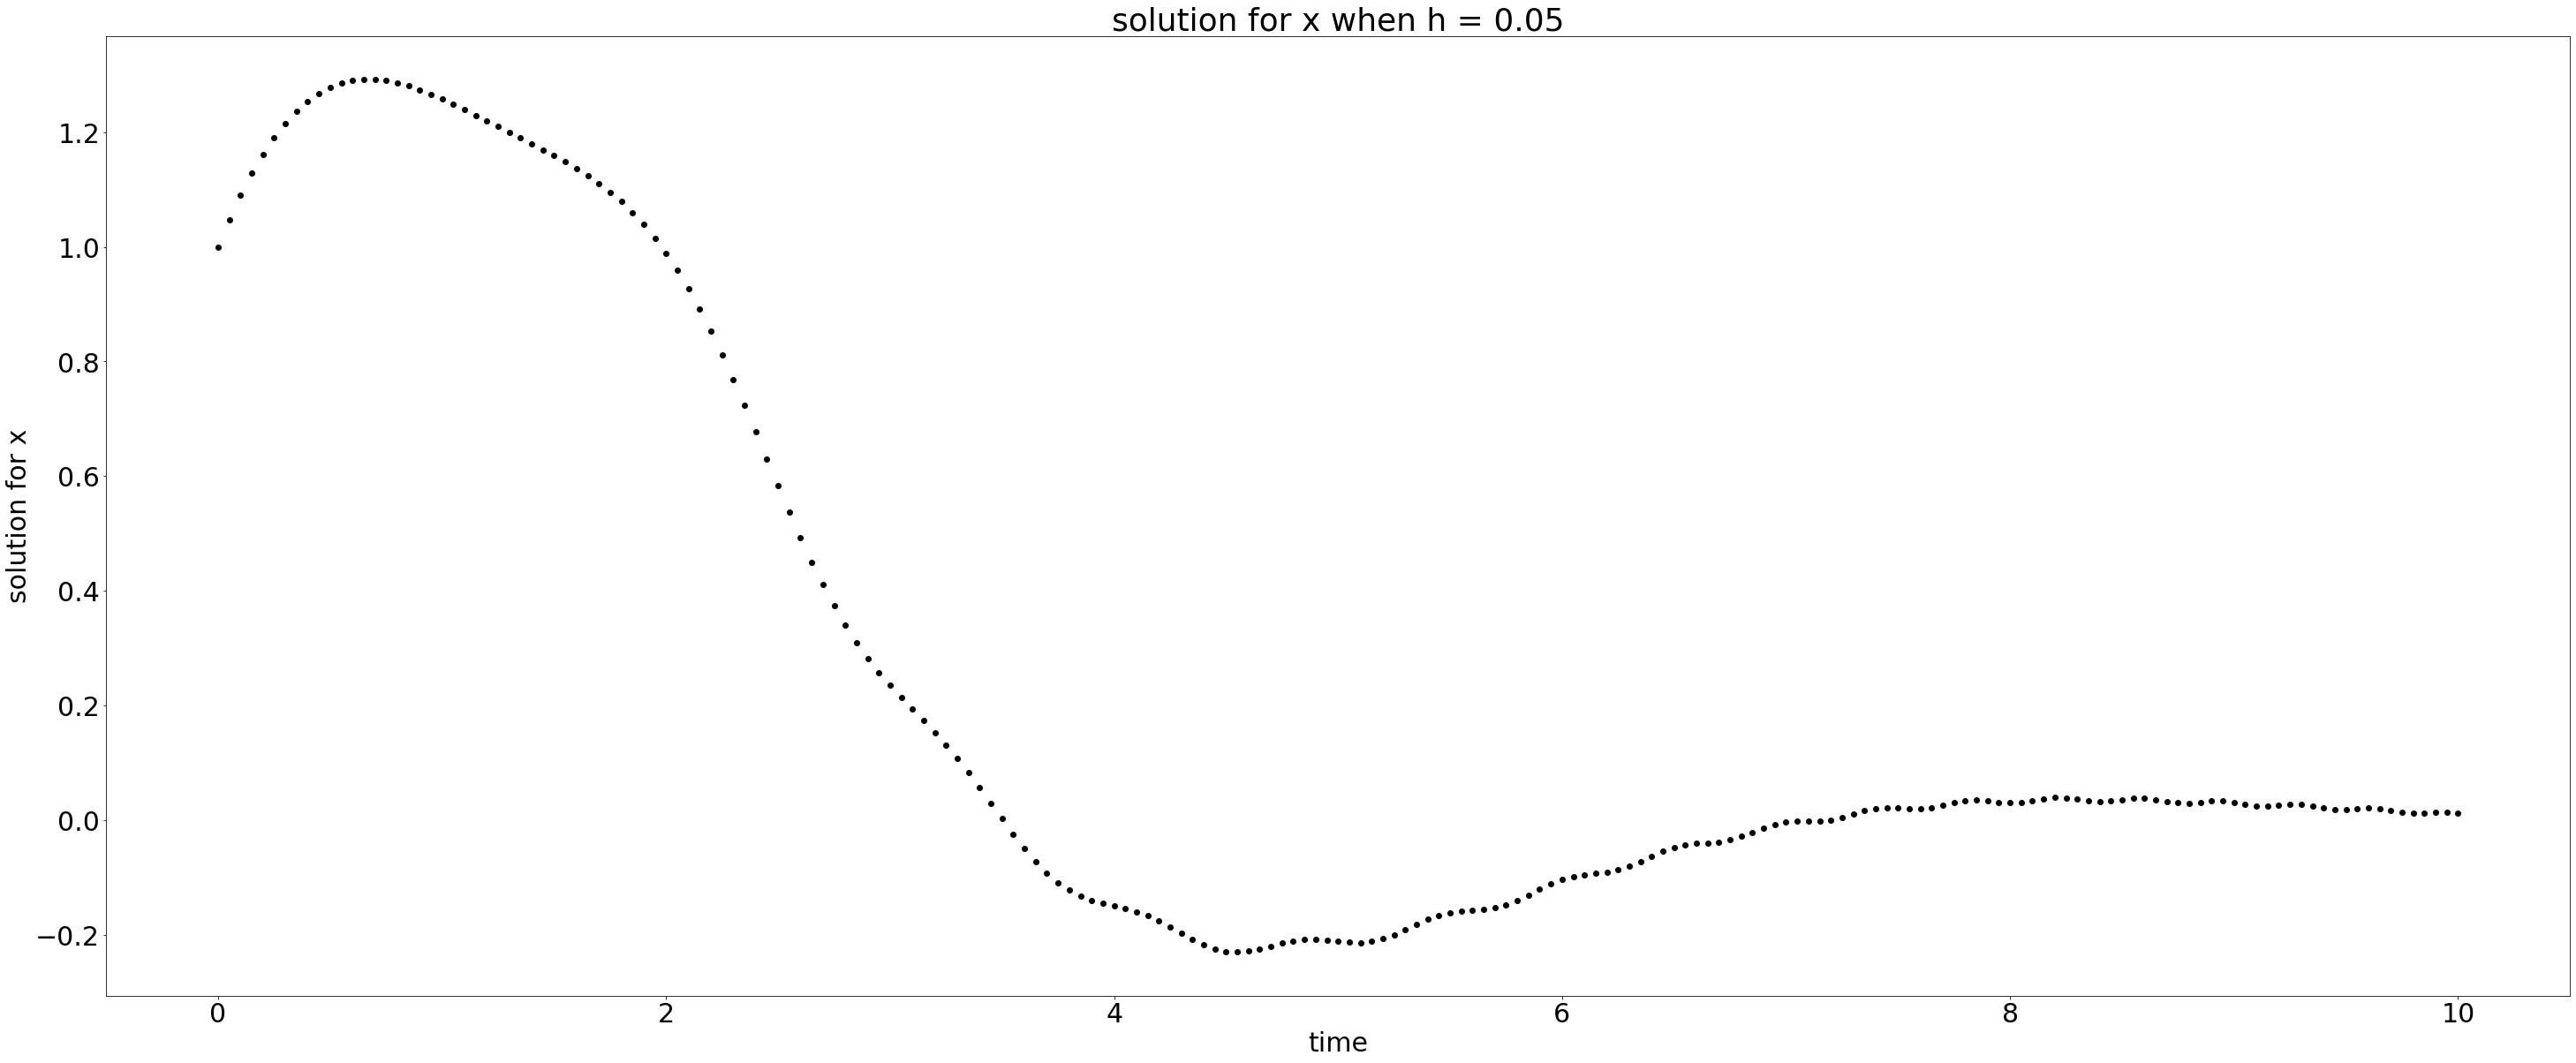

In [202]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 30})
plt.scatter(t_h2,x_sol_h2,alpha=1, color='k')
plt.xlabel('time')
plt.ylabel('solution for x')
plt.title('solution for x when h = 0.05')

Text(0.5, 1.0, 'solution for x when h = 0.025')

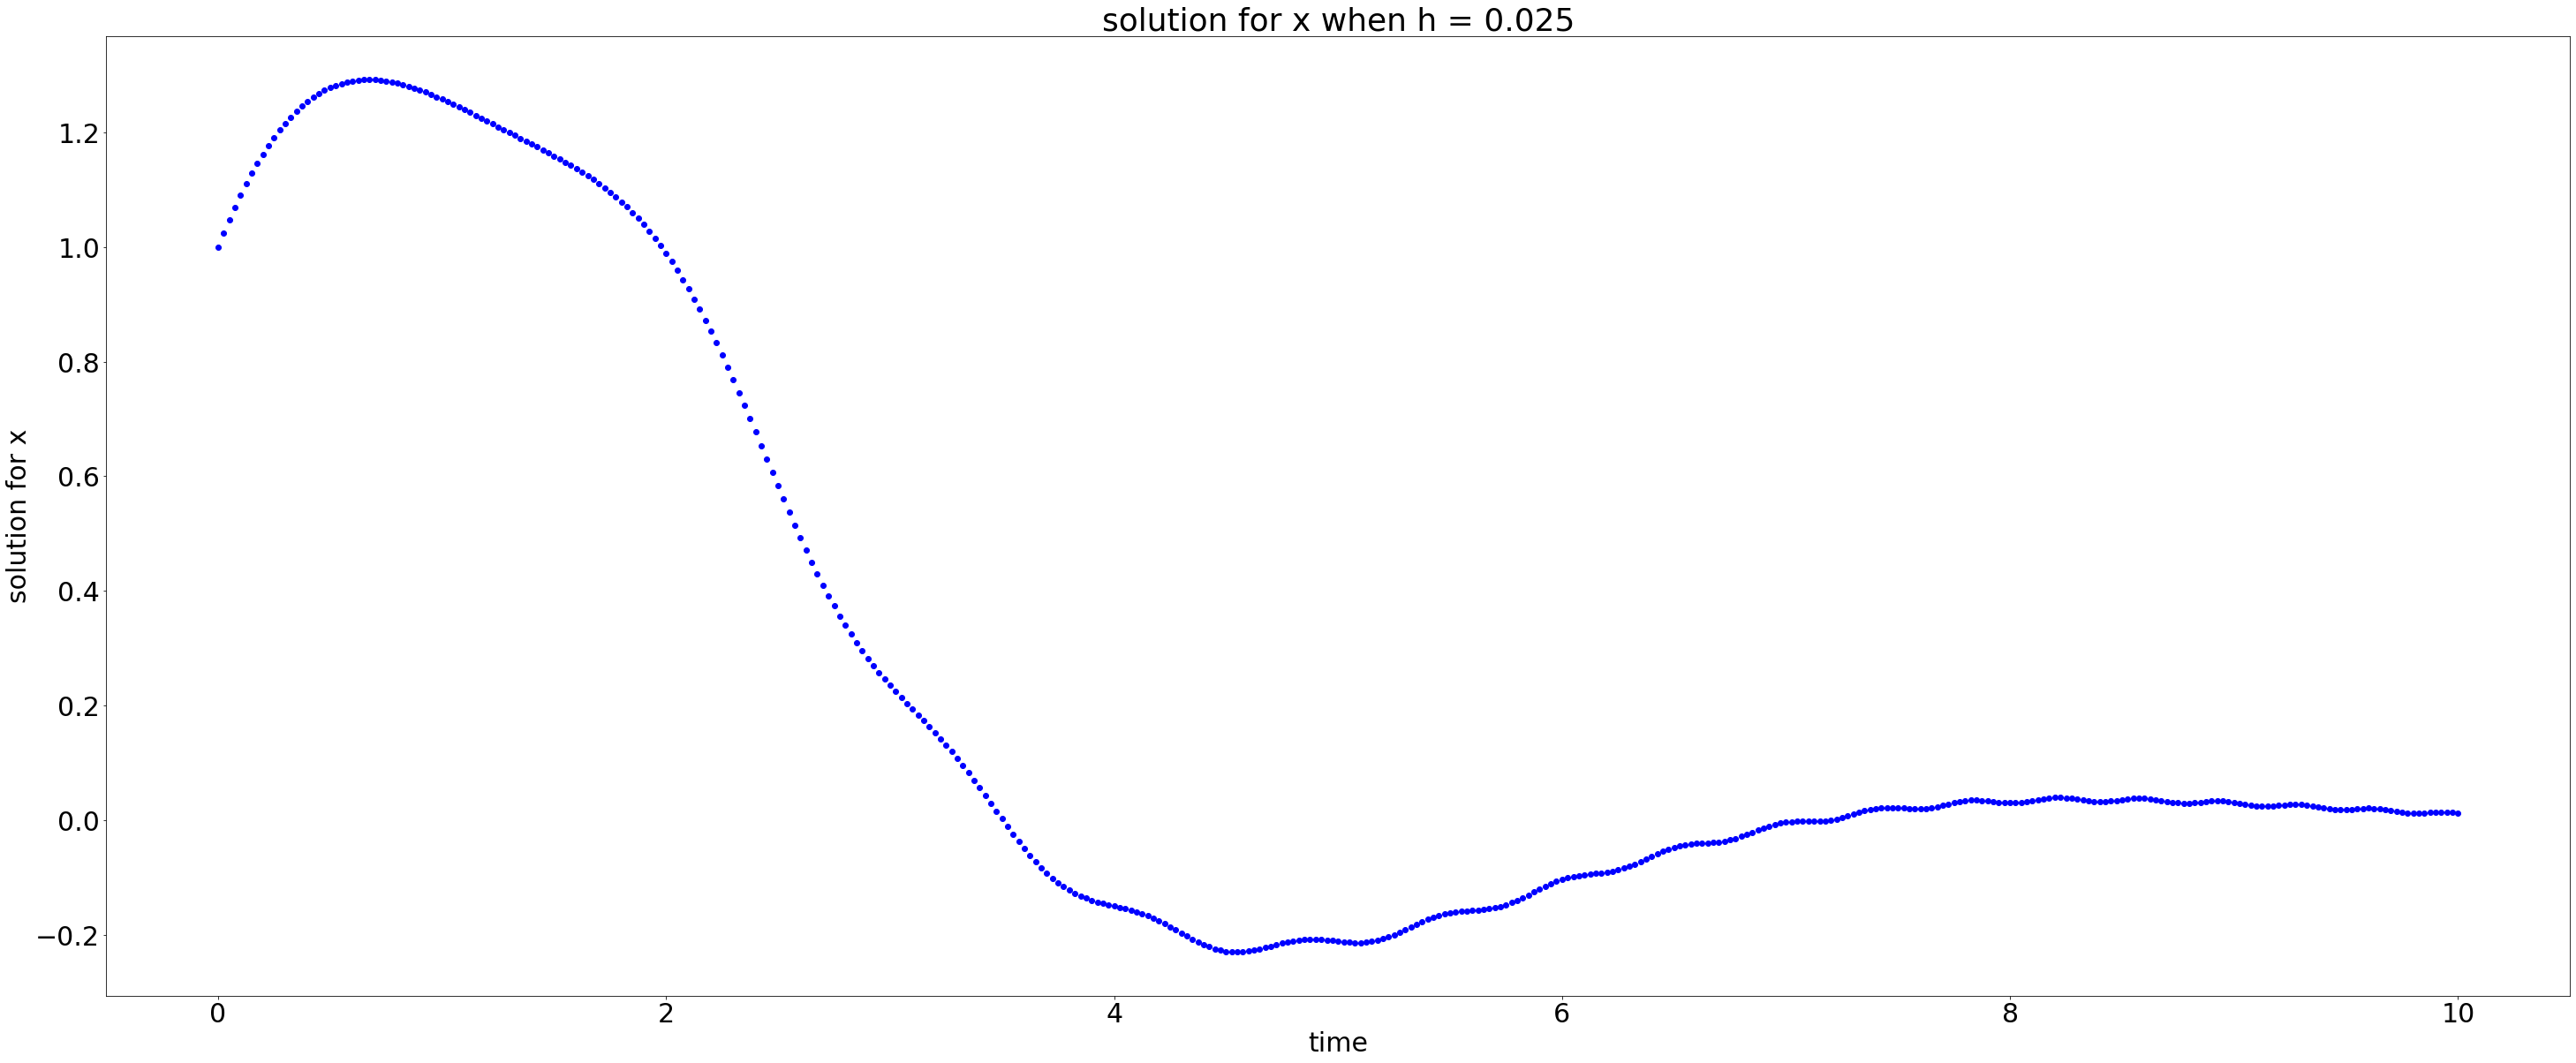

In [203]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 30})
plt.scatter(t_h3,x_sol_h3,alpha=1, color='b')
plt.xlabel('time')
plt.ylabel('solution for x')
plt.title('solution for x when h = 0.025')

Text(0.5, 1.0, 'solution for xp when h = 0.1')

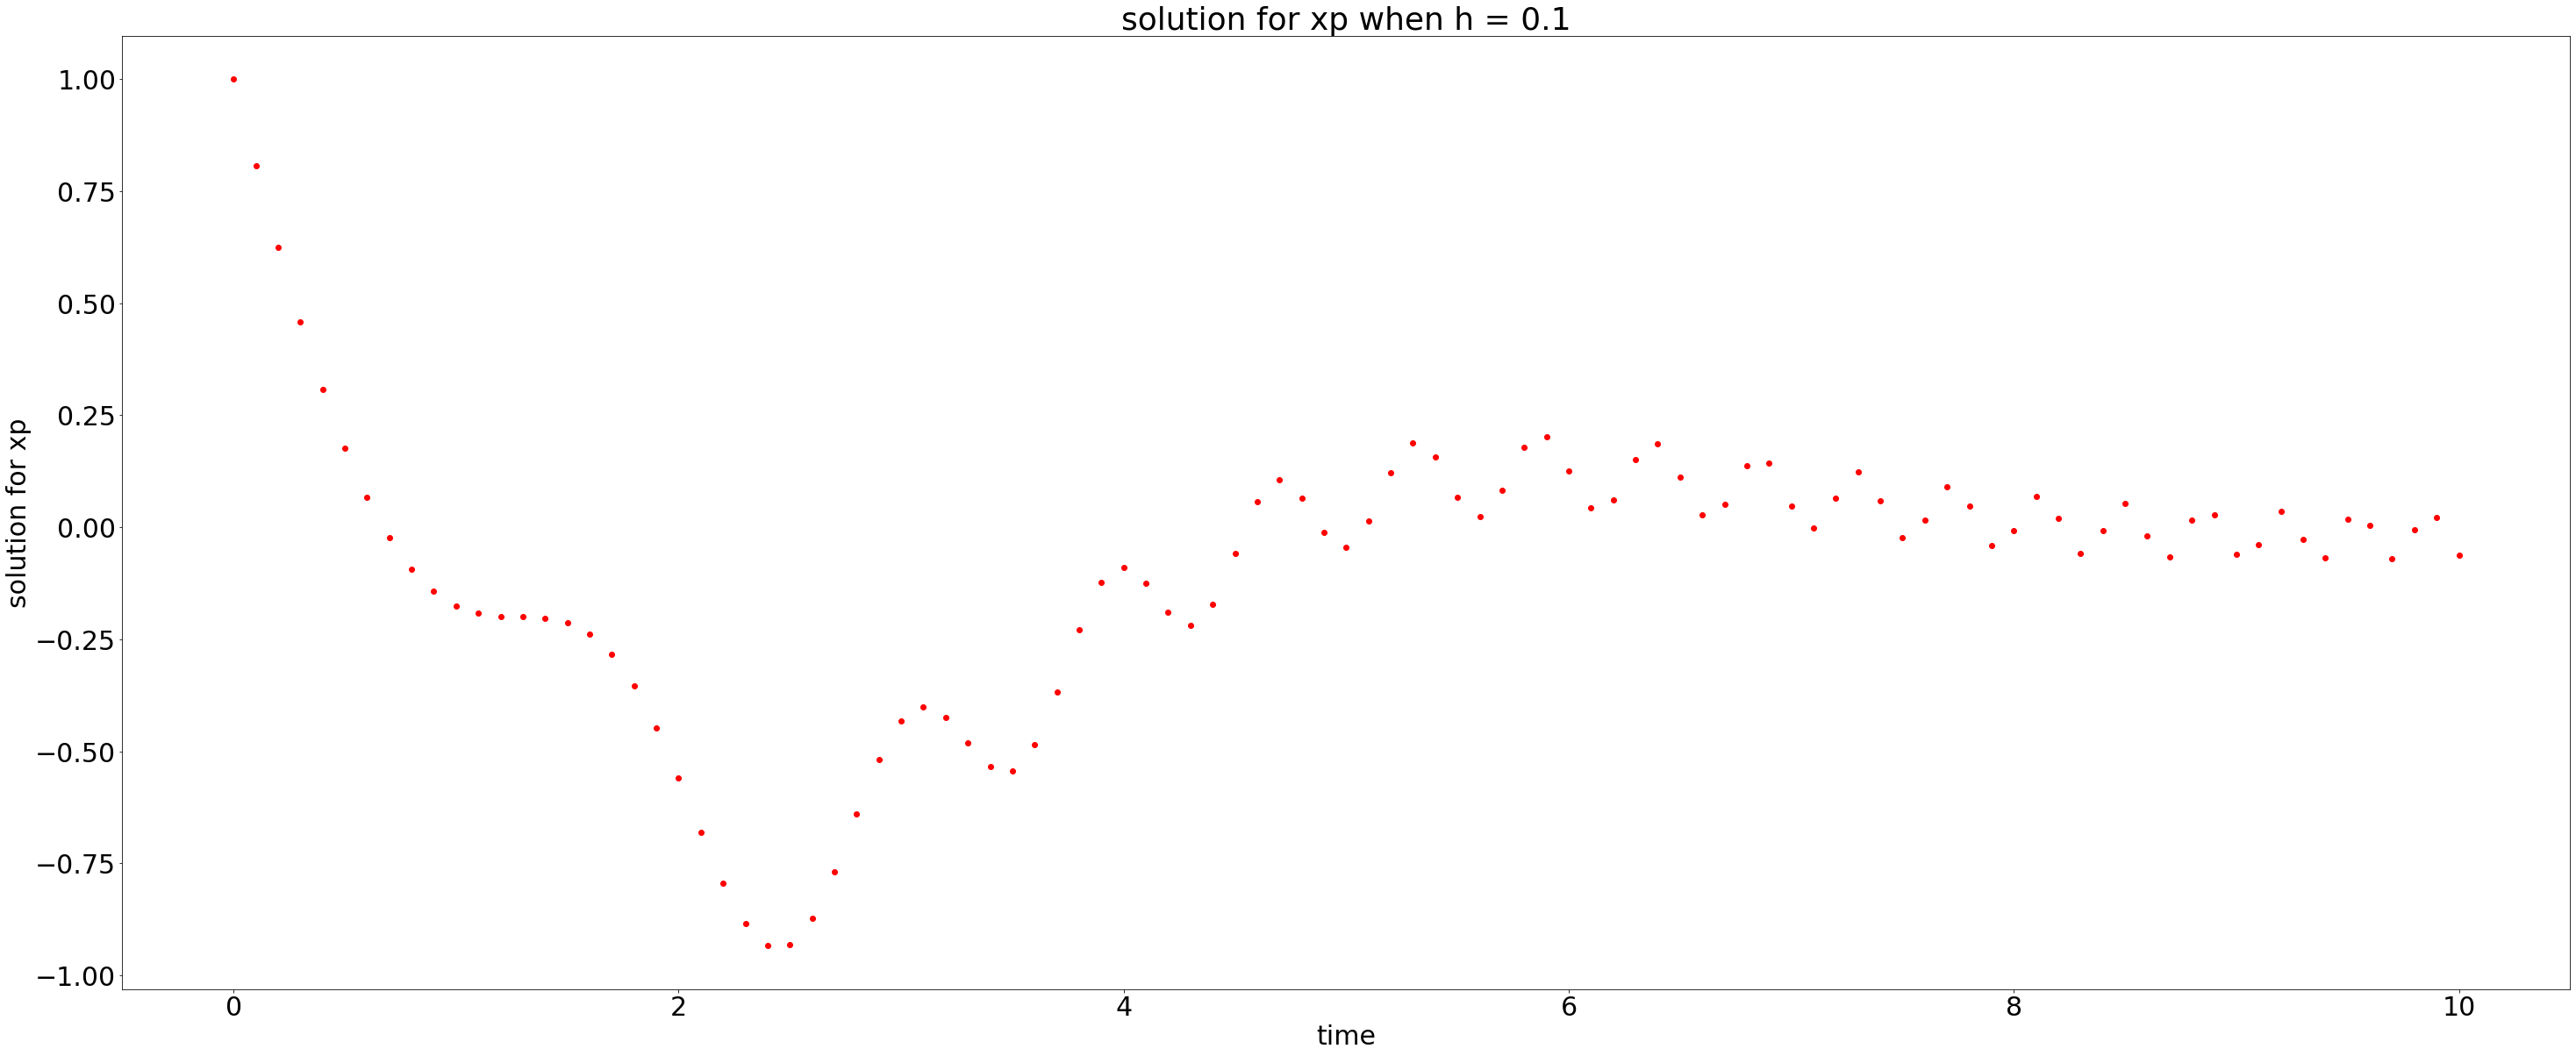

In [204]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 30})
plt.scatter(t_h1,xp_sol_h1,alpha=1, color='r')
plt.xlabel('time')
plt.ylabel('solution for xp')
plt.title('solution for xp when h = 0.1')

Text(0.5, 1.0, 'solution for xp when h = 0.05')

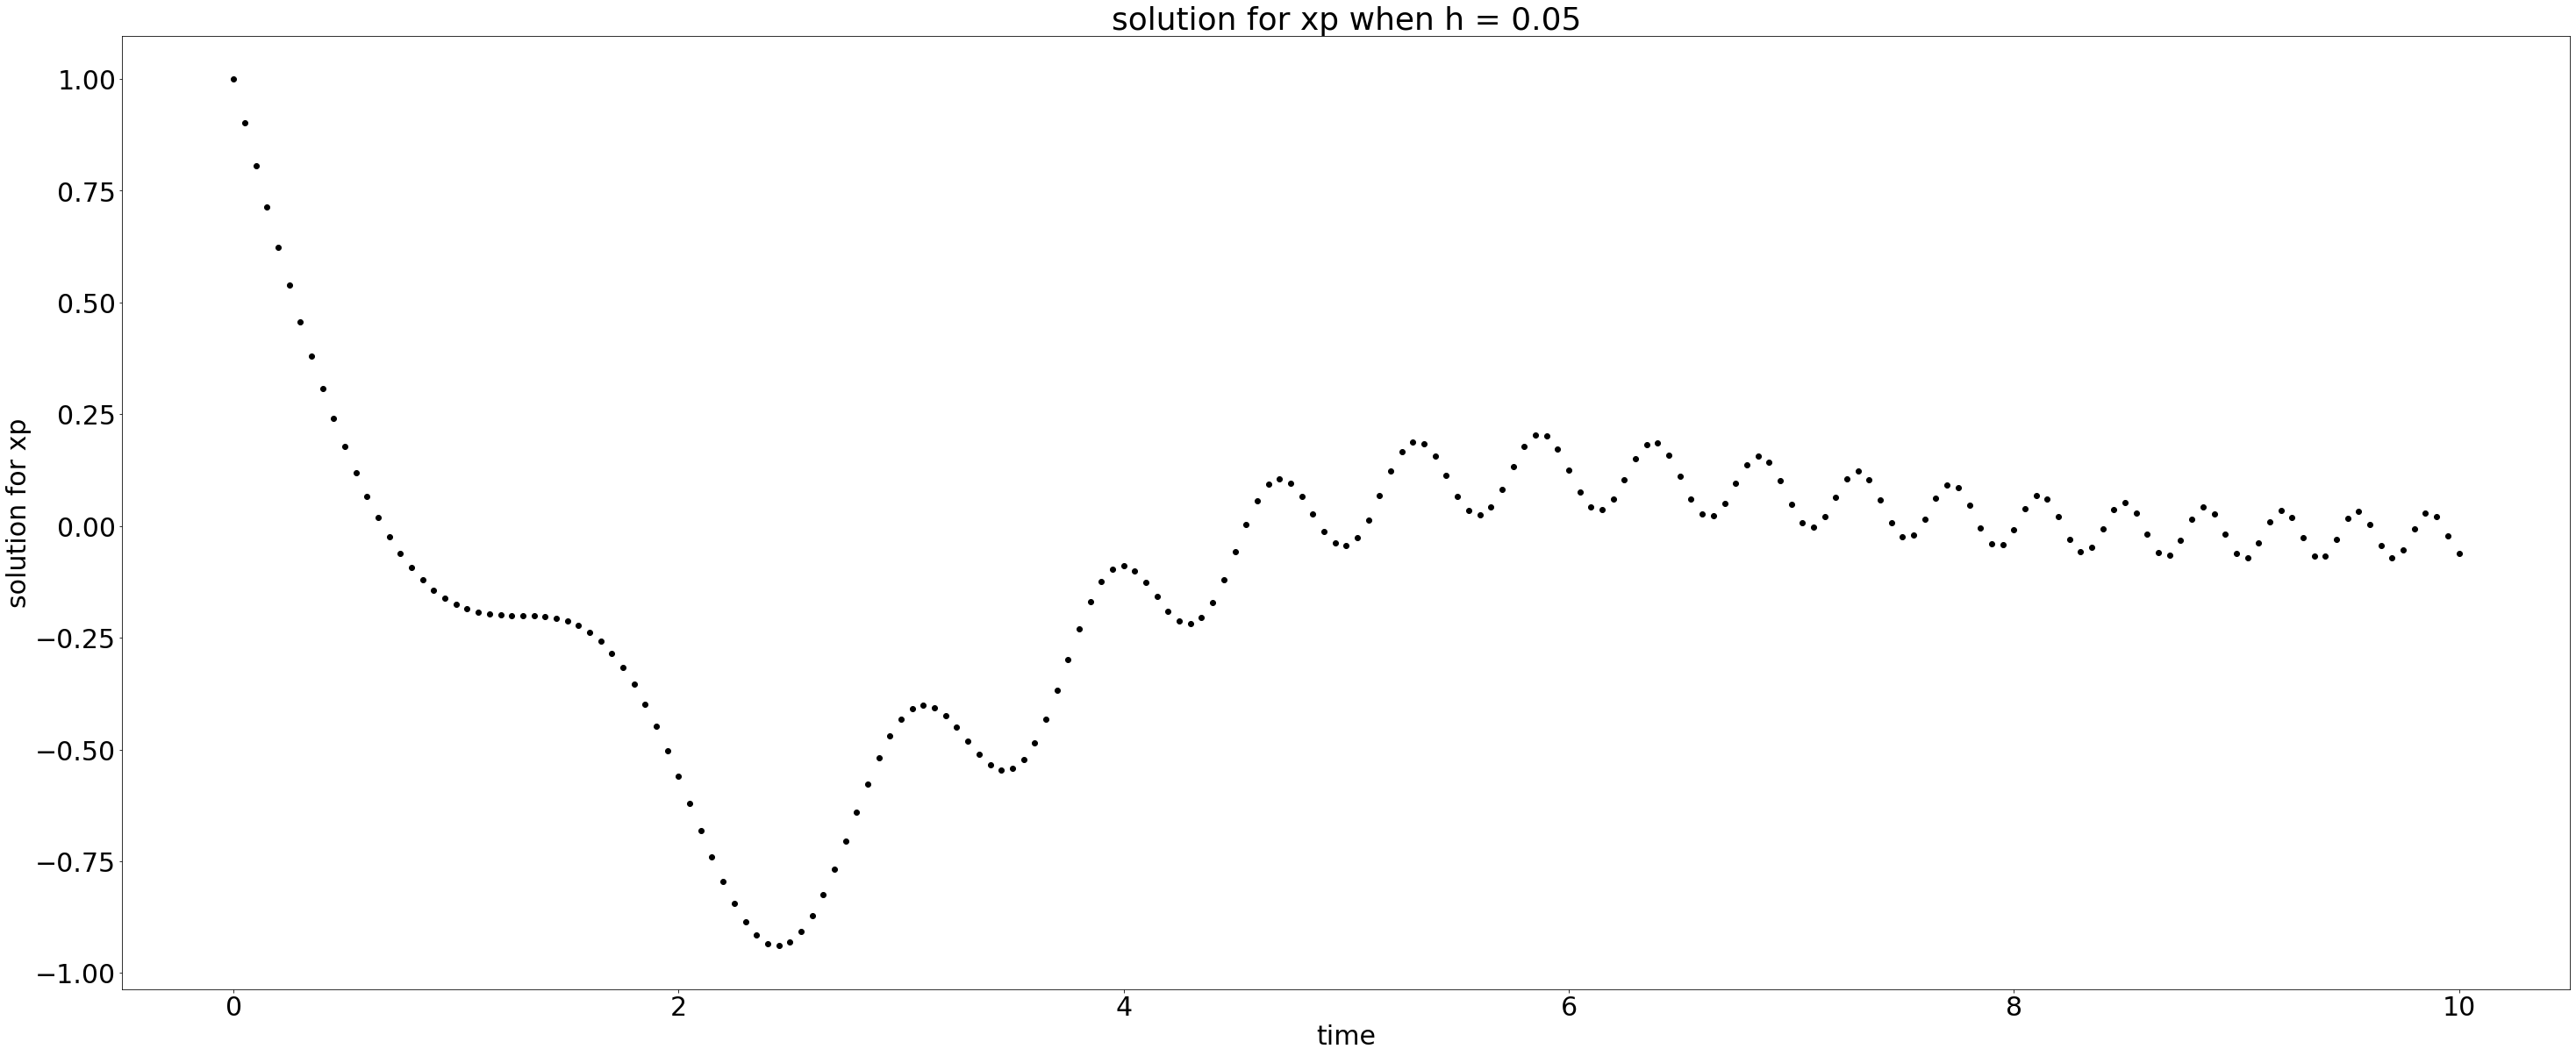

In [205]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 30})
plt.scatter(t_h2,xp_sol_h2,alpha=1, color='k')
plt.xlabel('time')
plt.ylabel('solution for xp')
plt.title('solution for xp when h = 0.05')

Text(0.5, 1.0, 'solution for xp when h = 0.025')

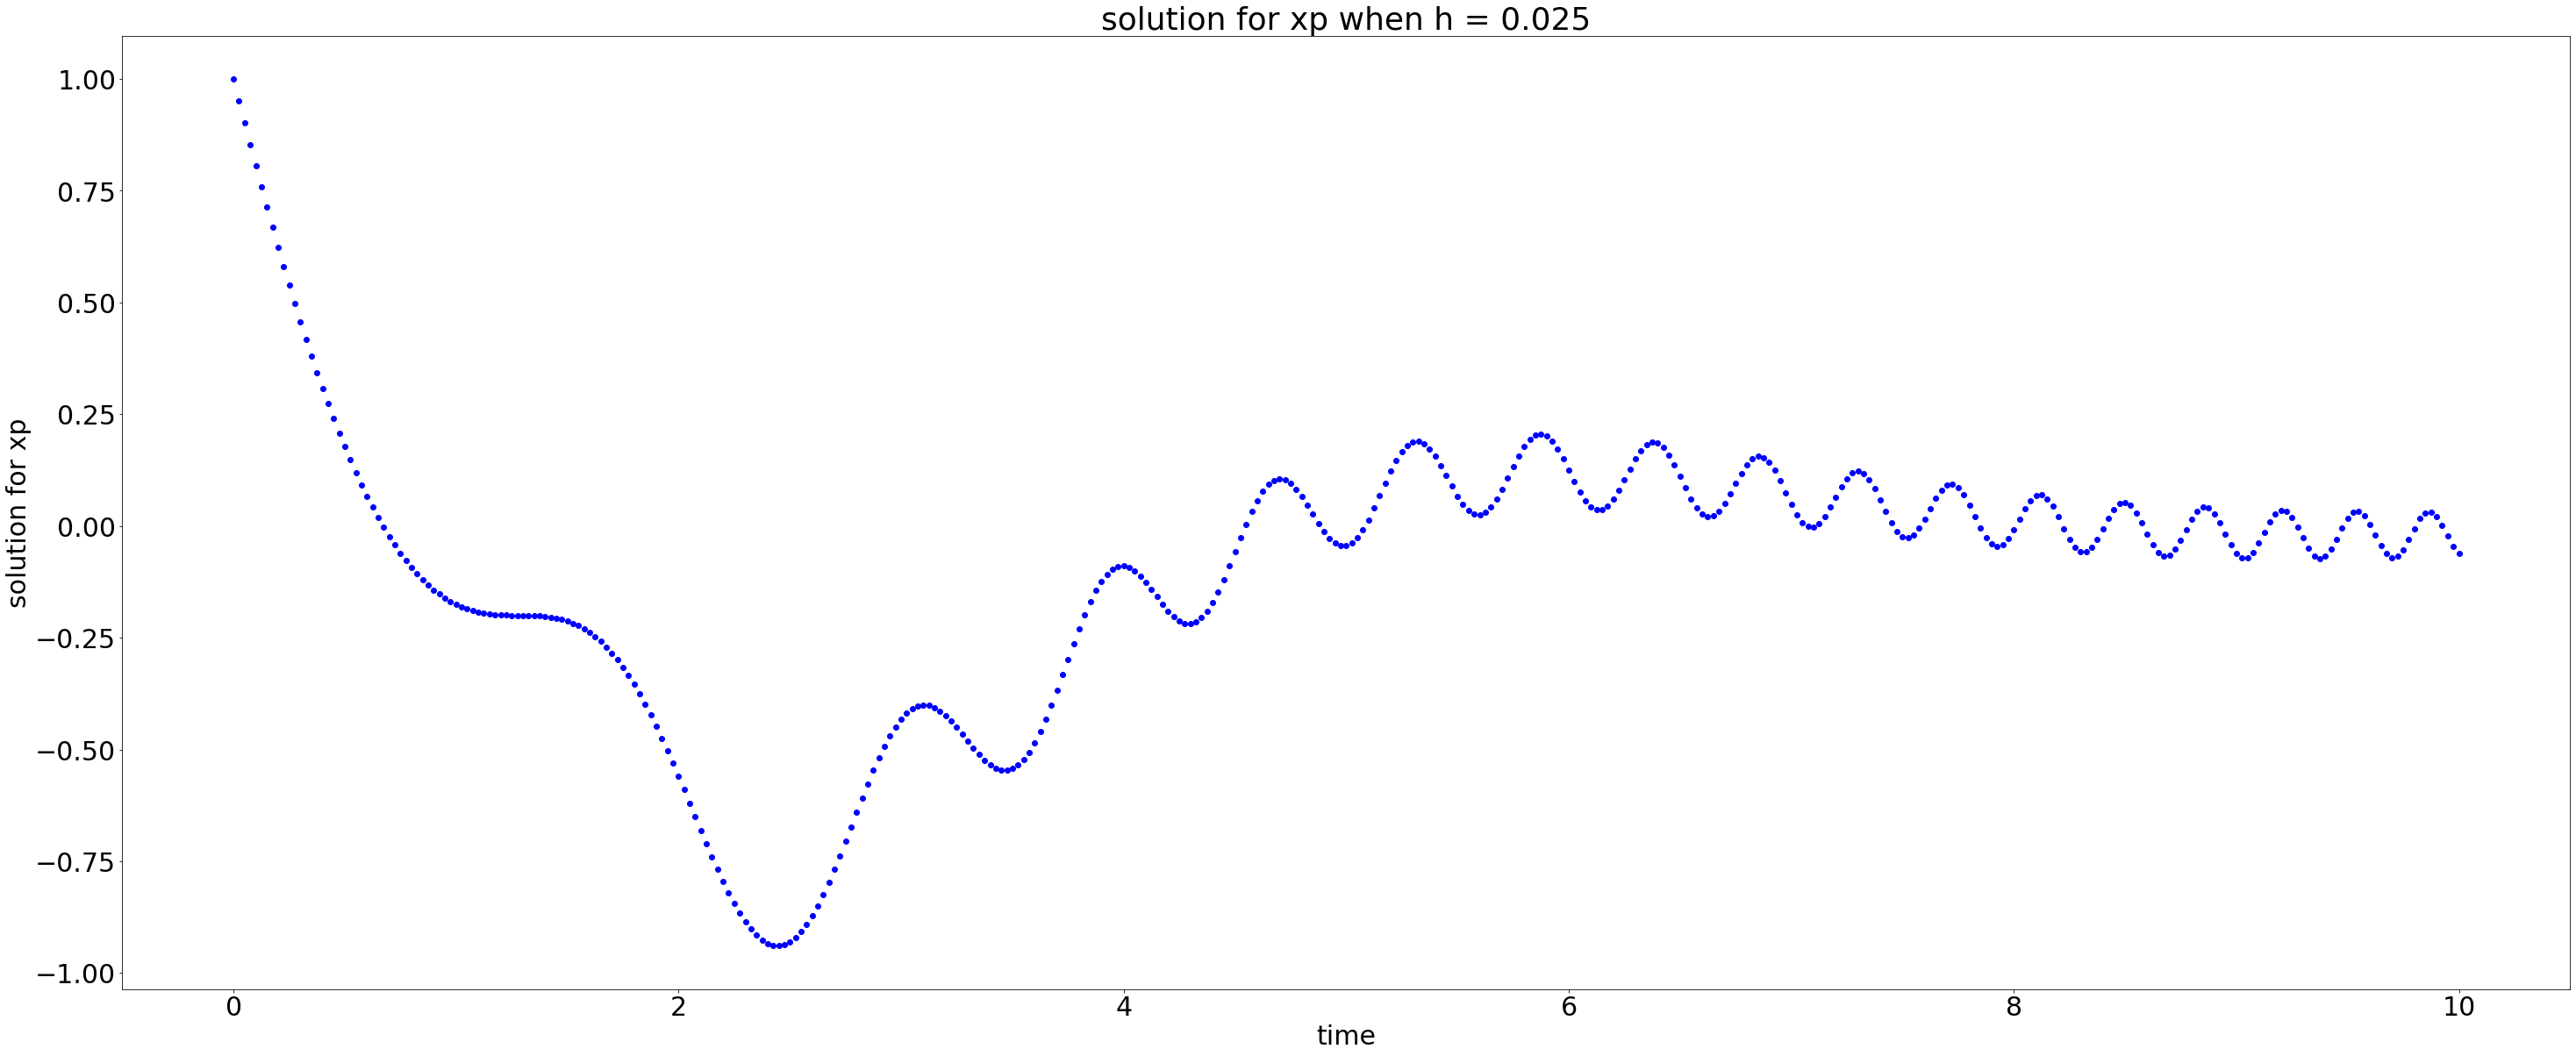

In [195]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 30})
plt.scatter(t_h3,xp_sol_h3,alpha=1, color='b')
plt.xlabel('time')
plt.ylabel('solution for xp')
plt.title('solution for xp when h = 0.025')